<h1>Final Project Tutorial - Taeyoon Kim, Victor Chang</h1>

In this tutorial, you will apply your data science skills to see how well we can classify a mushroom by it's edibility.

<h2>Introduction</h2>
<p>In this tutorial, you will apply your data science skills to see how well we can classify a mushroom by it's edibility. We will be using mushroom data provided by UC Irvine to train our machine learning algorithms.</p>
<a href='https://www.kaggle.com/uciml/mushroom-classification'>Mushroom Dataset</a>

<h2>Getting Started...</h2>
<p>Before getting started, you will need to install a couple things. First, make sure you have <a href='https://docs.continuum.io/anaconda/install'>Anaconda</a> installed on your computer. Then, use Anaconda's package manager to install 'pandas', 'numpy', 'matplotlib', 'graphviz', and 'sklearn'.</p>
<p>Also, download the mushroom dataset <a href='https://www.kaggle.com/uciml/mushroom-classification'>here.</a></p>
<p>After setting up the environment and dataset, create a jupyter notebook and import the following packages</p>


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from graphviz import Source
from operator import itemgetter
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from operator import itemgetter
from os import system

<h3>Data Preparation</h3>
1.) Import the "mushrooms.csv" file and create a dataframe.

In [102]:
shrooms_df = pd.read_csv('mushrooms.csv')
shrooms_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<p>2.) Check to make sure the data is clean. The <a href="https://www.kaggle.com/uciml/mushroom-classification">dataset source page on Kaggle</a> enumerates the possible values for each attribute. Check to make sure all values are valid and look for any missing values</p>

In [103]:
poison = ['p', 'e']
cap_shape = ['b', 'c', 'x', 'f', 'k', 's']
cap_surface = ['f', 'g', 'y', 's']
cap_color = ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y']
bruises = ['t', 'f']
odor = ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's']
gill_attachment = ['a', 'd', 'f', 'n']
gill_spacing = ['c', 'w', 'd']
gill_size = ['b', 'n']
gill_color = ['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y']
stalk_shape = ['e', 't']
stalk_root = ['b', 'c', 'u', 'e', 'z', 'r']
stalk_surface_above_ring = ['f', 'y', 'k', 's']
stalk_surface_below_ring = ['f', 'y', 'k', 's']
stalk_color_above_ring = ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y']
stalk_color_below_ring = ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y']
veil_type = ['p', 'u']
veil_color = ['n', 'o', 'w', 'y']
ring_number = ['n', 'o', 't']
ring_type = ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z']
spore_print_color = ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y']
population = ['a', 'c', 'n', 's', 'v', 'y']
habitat = ['g', 'l', 'm', 'p', 'u', 'w', 'd']

classifications = [poison, cap_shape, cap_surface, cap_color, bruises, \
                  odor, gill_attachment, gill_spacing, gill_size, \
                  gill_color, stalk_shape, stalk_root, stalk_surface_above_ring, \
                  stalk_surface_below_ring, stalk_color_above_ring, \
                  stalk_color_below_ring, veil_type, veil_color, \
                  ring_number, ring_type, spore_print_color, population, \
                  habitat]

printed = False

for index, row in shrooms_df.iterrows():
    for i in range(0, len(classifications)):
        if (not (row[i] in classifications[i])):
            shrooms_df.set_value(index, shrooms_df.columns.values[i], np.nan)

<p>3.) Split the dataset into training and test sets</p>

In [153]:
train_df, test_df = train_test_split(shrooms_df, test_size = 1/3, random_state = 1)

train_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
297,e,x,f,g,f,n,f,w,b,p,...,f,w,w,p,w,o,e,k,s,g
2569,e,f,y,e,t,n,f,c,b,w,...,s,w,w,p,w,o,p,k,v,d
2156,e,x,y,n,t,n,f,c,b,n,...,s,p,g,p,w,o,p,n,y,d
2565,e,x,f,e,t,n,f,c,b,w,...,s,w,p,p,w,o,p,k,y,d
4854,p,x,y,y,f,f,f,c,b,h,...,k,p,n,p,w,o,l,h,y,d


Before we train our decision tree, we want to see the information gain associated with each attribute, so we have a good idea of what the most important splits in the tree will be.

In [154]:
def entropy (df):
    num_rows = len(df)
    class_counts = df['class'].value_counts()
    if (len(class_counts) < 2):
        return 0
    p_ratio = (class_counts['p']/num_rows)
    e_ratio = (class_counts['e']/num_rows)
    return - p_ratio*math.log(p_ratio, 2) - e_ratio*math.log(e_ratio, 2)

entropy(train_df)

0.9986759752746347

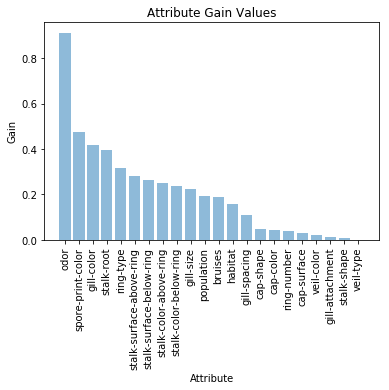

In [166]:
num_rows = len(train_df)
gain = {}
full_entropy = entropy(train_df)

for attribute in train_df.columns.values[1:]:
    value_counts = train_df[attribute].value_counts()
    attr_entropy = 0
    for val in value_counts.index:
        val_ent = entropy(train_df[train_df[attribute] == val])
        attr_entropy = attr_entropy + (value_counts[val]/num_rows) * val_ent
    gain[attribute] = full_entropy - attr_entropy

sorted_gain = sorted(gain.items(), key=itemgetter(1), reverse = True)
list_gains = list(map(list, zip(*sorted_gain)))

attributes = list_gains[0]
y_pos = np.arange(len(attributes))
gains = list_gains[1]
plt.bar(y_pos, gains, align='center', alpha=0.5)
plt.xticks(y_pos, attributes, rotation = 'vertical')
plt.ylabel('Gain')
plt.xlabel('Attribute')
plt.title('Attribute Gain Values')
plt.show()

<p>Unfortunately, the decision trees implemented in scikit-learn only use numerical features (<a href="https://datascience.stackexchange.com/questions/5226/strings-as-features-in-decision-tree-random-forest">Link</a>), so we need to apply a one-hot encoding to our dataset since our values are not numbers.</p>
<p>4.) Apply a one hot encoding to the dataset</p>

In [156]:
encoded_train = pd.get_dummies(train_df, \
                               columns = list(train_df.columns.values)[1:])
encoded_train.head(5)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
297,e,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2569,e,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2156,e,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2565,e,0,0,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
4854,p,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


Example decision tree 

In [157]:
y_train = encoded_train['class']
x_train = encoded_train[list(encoded_train.columns[1:])]

decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) # min_samples_split=20, random_state=99)
decision_tree.fit(x_train, y_train)

with open("assets/dt.dot", 'w') as f:
    export_graphviz(decision_tree, out_file = f, feature_names=encoded_train.columns[1:])
    f.close()
    
with open("assets/dt.dot", 'r') as f:
    temp = f.read()
    s = Source(temp, filename="assets/dt", format="png")
    s.render(cleanup = True) # Save as png file
    f.close()

<img src="assets/dt.png" height="600" width="600">

k-Fold Cross-Validation


In [158]:
def k_fold_cv (X, Y, classifier, param_grid, cv):
    grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=cv)
    grid_search.fit(X,Y)
    return grid_search

def get_top_n_scores(grid_scores, n):
    top_n_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n]
    for i, score in enumerate(top_n_scores):
        print("Rank: " + str(i + 1))
        print("Mean Test score: " + str(score.mean_validation_score))
        print("Max-Depth: " + str(score.parameters) + "\n")
    
param_grid = {"max_depth": np.array(range(1, len(train_df.columns[1:])))}
dt_classifier = DecisionTreeClassifier()
grid_search = k_fold_cv(x_train, y_train, dt_classifier, param_grid, cv = 10)

get_top_n_scores(grid_search.grid_scores_, 5)

Rank: 1
Mean Test score: 0.9998153618906942
Max-Depth: {'max_depth': 8}

Rank: 2
Mean Test score: 0.9998153618906942
Max-Depth: {'max_depth': 9}

Rank: 3
Mean Test score: 0.9998153618906942
Max-Depth: {'max_depth': 10}

Rank: 4
Mean Test score: 0.9998153618906942
Max-Depth: {'max_depth': 11}

Rank: 5
Mean Test score: 0.9998153618906942
Max-Depth: {'max_depth': 12}



In [159]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8) # min_samples_split=20, random_state=99)
decision_tree.fit(x_train, y_train)

with open("assets/optimal.dot", 'w') as f:
    export_graphviz(decision_tree, out_file = f, feature_names=encoded_train.columns[1:])
    f.close()
    
with open("assets/optimal.dot", 'r') as f:
    temp = f.read()
    s = Source(temp, filename="assets/optimal", format="png")
    s.render(cleanup = True) # Save as png file
    f.close()

<img src="assets/optimal.png" height="600" width="600">

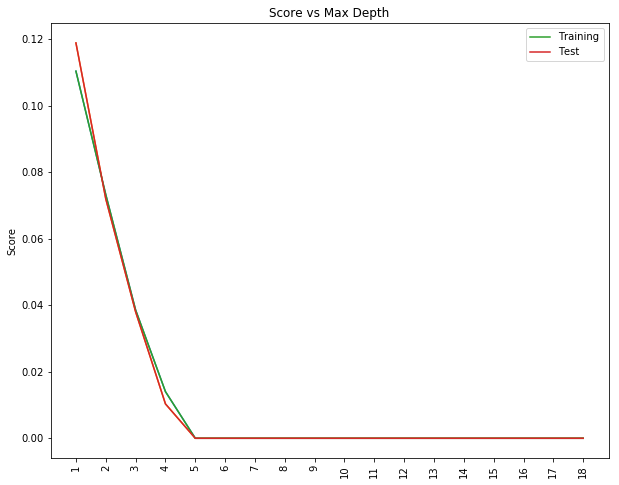

In [189]:
y_train = encoded_train['class']
x_train = encoded_train[list(encoded_train.columns[1:])]

encoded_test = pd.get_dummies(test_df, \
                               columns = list(test_df.columns.values)[1:])
y_test = encoded_test['class']
x_test = encoded_test[list(encoded_test.columns[1:])]

loss = {'training': {}, 'test': {}}

for i in np.array(range(1, len(train_df.columns[1:20]))):
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    decision_tree.fit(x_train, y_train)
    train_predict = decision_tree.predict(x_train)
    test_predict = decision_tree.predict(x_test)
    loss['training'][i] = zero_one_loss(y_train, train_predict)
    loss['test'][i] = zero_one_loss(y_test, test_predict)

y_pos = np.array(range(1, len(train_df.columns[1:20])))
train_line, = plt.plot(list(loss['training'].keys()), list(loss['training'].values()), label = "Training")
test_line, = plt.plot(list(loss['test'].keys()), list(loss['test'].values()), label = "Test")
plt.xticks(y_pos, y_pos, rotation = 'vertical')
plt.ylabel('Score')
plt.title('Score vs Max Depth')
plt.legend(handles=[train_line, test_line])
plt.show()